# TDT4173: Machine Learning and Case-Based Reasoning - Assignment 3
### Author: Vittorio Triassi 
***

# Task 2.1 - k-NN implementation from scratch 

Implement **k-nearest neighbour** (k-NN) algorithm from scratch. Reuse this k-NN program to implement k-NN regression (could be based on simple mean) and classification (could be based on voting). Display the results (including all 10 nearest neighbours), where $k = 10$ for the $124^{th}$ example from the given dataset (i.e. $X[124] = [6.3, 2.7, 4.91]$ for regression and $[6.3, 2.7, 4.91, 1.8]$ for classification) as your test sample. The data set for regression and classification are in `knn_regression.csv` and `knn_classification.csv` files respectively. **The data set is not indexed, and has column names for features as** $[x_1; x_{x2}; ...; x_n]$, **and the target as y.**
***

For the purpose of the following task, `numpy`,`pandas` and `matplotlib` have been used. Let us start by importing them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

### k-Nearest Neighbors with regression

The first step involves reading the `csv` file in which all the examples are stored. Then, we split the feature vectors and the target to carry out the task.

In [2]:
df_reg = pd.read_csv('dataset/knn_regression.csv')

X_reg = np.array(df_reg.drop('y', 1))
y_reg = np.array(df_reg.drop(df_reg.columns[[0, 1, 2]], axis = 1))

It is always a good idea to plot our data. Since we have three dimensional examples, we will plot them in 3D:

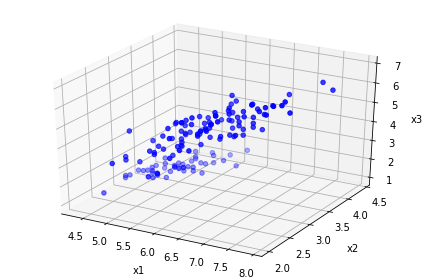

In [3]:
# Store the features
x1_reg = X_reg[:, 0]
x2_reg = X_reg[:, 1]
x3_reg = X_reg[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(x1_reg, x2_reg, x3_reg, c = 'b', marker='o')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('x3')

plt.tight_layout()
plt.show()

In order to compute the **k-Nearest Neighbors** with the regression approach, it is important for us to establish a distance measure. Such measure will be responsible for computing the $k$ smallest distances between our test example and all the previously stored data points. In our case, we will use as test example, the $124^{th}$ example of the file containing the training data. Moreover, we are interested in computing the k-NN when $k = 10$.

Since the Euclidean distance is the most used and it is a L2 norm, we decide to use `numpy.linalg.norm`, which by default implements for the `ord` parameter the norm 2. 

In [4]:
# testExample = new data point
# k = number of neighbors we are interested in
def computeDistances(X, testExample, k):
    
    distances = []
    
    for i in range(len(X_reg)):
        distances.append([np.linalg.norm(X[i] - testExample), i])
        
    # sort the list to have the smallest distances in the top    
    distances = sorted(distances, key = lambda x: x[0])
    # take only the first k distances
    distances = distances[:k]
    
    return distances

After we have defined how to compute the $k$ smallest distances between our test example and our dataset we are ready to perform the **k-Nearest Neighbors** based on mean.

In [5]:
# testExample = new data point
# k = number of neighbors we are interested in
def kNNRegression(X, testExample, k):
    
    distances = computeDistances(X, testExample, k) 
    
    print(*distances, sep = "\n")
    print("\n")
    
    samples = []
    
    for i in range(len(distances)):
        samples.append(distances[i][1])
    
    s = 0
    for i in samples:
        s += y_reg[i]
    prediction = s / k
    
    return prediction

Now we use our k-NN implementation and predict on a test example

In [14]:
k_reg = 10
testExample_reg = X_reg[123]
pred_reg = kNNRegression(X_reg, testExample_reg, k_reg)

print("k-Nearest Neighbors (regression) with k = " + str(k_reg))
print("Test example = " + str(testExample_reg) + ". Prediction: " + str(pred_reg))

[0.0, 123]
[0.17320508075688762, 126]
[0.20000000000000018, 72]
[0.22360679774997816, 133]
[0.22360679774997896, 146]
[0.30000000000000016, 73]
[0.3464101615137755, 63]
[0.3605551275463984, 83]
[0.3605551275463989, 127]
[0.3741657386773947, 54]


k-Nearest Neighbors (regression) with k = 10
Test example = [6.3 2.7 4.9]. Prediction: [1.6]


### k-Nearest Neighbors with classification

Since we are working with another dataset, we repeat the same step seen earlier. We import the new `csv` file and split the feature vectors from the target attribute.

In [7]:
df = pd.read_csv('dataset/knn_classification.csv')

X = np.array(df.drop('y', 1))
y = np.array(df.drop(df.columns[[0, 1, 2, 3]], axis = 1))

This time, the k-NN algorithm is addressed as a classification problem. In fact, we want to classify the $k$ nearest data points to our test example considering a majority vote approach. We do not need to define the distance measure again since it will be the same used before.

In [8]:
def kNNClassification(X, testExample, k):
    
    distances = computeDistances(X, testExample, k)  
    
    for i in range(len(distances)):
        distances[i][0] = round(distances[i][0], 3)
        
    print(*distances, sep = "\n")
    print("\n")
    
    counts = Counter(x[0] for x in distances)
    minimum_distance = counts.most_common(k)[0][0]
    
    # array used to store predictions in
    # the case we have ties in 'distances'
    predictions = []
    
    for i in range(len(distances)):
        if(minimum_distance == distances[i][0]):
            predictions.append(y[distances[i][1]])
    
    # we draw a random prediction among the classes
    # we think might satisfy our problem
    prediction = random.choice(predictions)
    
    return prediction

We finally run our k-NN version based on a classification approach

In [45]:
k = 10
testExample = X[123]
pred = kNNClassification(X, testExample, k)

print("k-Nearest Neighbors (classification) with k = " + str(k))
print("Test example = " + str(X[123]) + ". Prediction: " + str(pred))

[0.0, 123]
[0.173, 126]
[0.245, 146]
[0.361, 127]
[0.361, 72]
[0.374, 133]
[0.412, 83]
[0.424, 111]
[0.436, 138]
[0.48, 54]


k-Nearest Neighbors (classification) with k = 10
Test example = [6.3 2.7 4.9 1.8]. Prediction: [1]
